# Neutron Emitting Spot Size - Experiment

- the powerpoint file containing information on the experiment is in /Users/hkromer/02_PhD/04_Publiations/04_Reports/06_NeutronEmittingSpotSize/2018-08-14_IonOpticsCurrentTarget.pptx
- the experimental data is in 

## Experimental setup

- detector
    - detector is the St Gobain one, 0.5x0.5x2 cm
    - SiPM behind scintillator, with all settings as in Roberts work, energy cutoff is 0.7 MeV (X-ray discrimination)
    - scintillator wrapped in foil and black fabric around
    - wrapped scintillator is put inside copper structure that acts as a Faraday cage
    
    
- tungsten piece
    - 2 cm thick, 6 cm x 6 cm
    - tungsten alloy is WHD (wolfram high density) with >95% tungsten
    - 5.55 cm away from the source (closer compared to the finding of good parameters)
   
   
- aluminum structure
    - Aluminum profile structure. Squared on the table in the PSI workshop
    - with a laser finding the emitting spot on the target, then setting up the tungsten piece so that the laser strikes through it. The scintillator is anyways aligned such that the tungsten covers it perpendicular to its motion


### Experimental procedure


1. Background measurement of the detector with plasma on for one hour before and one hour after the measurement.
2. Counts in the detector recorded with Arduino readout (Roberts) in 30 second intervals. Roughly (!) 300 seconds of measurement for each edge position. This is why one cannot work with the total number of counts, but has to use the countrate in the evalulation.
3. After a measurement, the edge was moved in random fashion to another position (prevent source drift effects over time). There were 60 positions measured, more fine towards when the edge is at the spot.
4. There were three days of measurement:
    |   | 26.7.  | 27.7  | 30.7.  |
    |---|---|---|---|
    | HV [kV] | -76  | -75  | -75  | 
    | I [mA] | 1.13 - 1.25  | 1.04 - 1.24 | 1.09 - 1.13  |  
    |  DF [%] |  54 - 63 | 50 - 58  | 58 - 59  |  
    |  P [mbar] |  6.2e-3 - 6.4e-2 |  6.3e-3  |  6.2e-3 - 6.5e-2  |  


5. Evaluation
    - Background countrate C for before and after measurement, take the mean between the two as the final value: 
        $$C_{\text{BG}}=\frac{N_{\text{BG}}}{t_{\text{BG}}}$$<br> $t_{\text{BG}}$ is the time of the background counting and $N_{\text{BG}}$ is the total number of counts during that time period.
    - For each edge position compute the measurement time $t_{\text{meas}}$ during which the edge remained at the position
    - Correct the total number of counts $N_{\text{meas}}$ during that time with the background:
        $$N_{\text{meas}}^{corr}=N_{\text{meas}}-\left( C_{\text{BG}} \cdot t_{\text{meas}} \right)$$
    - The corrected countrate is computed from the total number of counts and the measurement time
        $$C_{\text{meas}}^{corr}=\frac{N_{\text{meas}}^{corr}}{t_{\text{meas}}}$$
    - Normalize the corrected countrate by the average dose $H_{avg}=\frac{\int_0^{t_{\text{meas}}} H\left( t \right) dt}{t_{\text{meas}}}$ recorded from the LB6411 sphere. The dose recorded is taken for the same measurement interval $t_{\text{meas}}$:
        $$C_{\text{meas}}^{corr,norm}=\frac{N_{\text{meas}}^{corr}}{H_{avg}}$$
    - Plotting of the ESF
    - Centering of the ESF since the x positions are arbitrary on the axis of the linear stage. This is done by finding the mean of the edge fully out of the path between detector and edge and the mean between edge fully in. Then taking a linear regression between the points in the center and finding the intersection between the means and that linear regression. The middle between the two intersection points will be the center. Lorenz has also found that the spot is shifted to one side! See the presentation.
    - Logistic fermi function fit, determining the FWHM from the c parameter
    - Calibration of the FWHM of the source term set in MCNP6 using the lookup table
        




## MCNP6 calibration

- gaussian source
    - 2.8 MeV neutrons (corresponding to 100 kV, but only at around 75 kV operated. Check with the energy curve Csikai!)
    - other settings were the same as for the finding of good parameters


- detector
    - St Gobain material definition
    - width and height is 0.5 cm
    - depth is 2 cm
    - composition in MCNP6 according to the specifications from the supplier
    - distance is 61 cm from the source (same as the experiment)
    
    
- tungsten
    - is also 2x6x6 cm same as in the experiment
    - material is pure tungsten
    - distance between tungsten piece and source is 4.55 cm same as experiment

    
- what is not modelled
    - aluminum structure
    - only the target, coolant, vacuum chamber is modelled (same as with the finding of good parameters)
    
    
- simulation for
    - 143 positions
    - gaussian FWHMs from 0.1 mm to 10 mm in steps of 0.1 mm

## E-Mail from Robert explaining some things
Paper about neutron emitting spot size measurement (Development and characterization of a D-D fast neutron generator for imaging applications)
- The text argues that the "penumbra at the source" was calculated. I would like to clarify if my understanding is correct: The penumbra is the geometrical unsharpness that results from the finite source, resulting in "smeared edges" on the detector screen when a sharp imaging object is imaged. In this context, what is the penumbra at the source? Is that the penumbra on the detector screen, but taking the magnification into account and computing it back "onto the source"? I am sorry if this description is a big "boogey".


There is no detector screen, rather a single detector which is scanned step by step with the linear motion table (Benoit is familiar with it and the controller, same controller as for the rotary table), I am not sure exactly how to describe it in an e-mail but maybe if you take a look at the MSc thesis it explains some details better, and if it's still unclear we can skype.
 
- It seems to me very difficult to align everything properly (I think you mentioned that at some point). How did you achieve that? I imagine some laser system can be useful? Even so a sub-mm accuracy is hard

Yes lasers, the source at that time was (a bit) easier to diassemble, so we took it apart and used the actual hole of the extraction as a reference point, and rigidly fixed a laser at the forward direction wall (i.e. the direction where ion beam goes) pointing at that extraction hole, then assembled the source back and practically never moved the laser, then aligned the edge perpendicular to that laser by again scanning it and looking at the light pattern on the edge, and then putting the detector there and doing the same. Hard to describe, lots of playing around until it seemed good. In our case the hope is that with a thin edge the perpendicularity of the edge is less critical, and also if the detector is more shallow it is also less critical that it is aligned perfectly, so with both of those true one can use maybe less complicated and precise alignment methods to get a reasonable result. What is important to keep in mind is that any "error" with alignment just means a blurred spot, so it is in all cases conservative (i.e. if you conclude from the FWHM that it's 2 mm, it is more like >=2 mm, i.e. "conservative" since we want it to be small)
 
.

- How does one compute the energy deposited in the detector volume with MCNP? Is that done in a separate step by computing the flux with MCNP and then some analytical way (Reaction rate & cross-section of elastic collision)

iirc the final approach was ptrac, or at least at some points ptrac was tried (which stands for "painful trac" I guess), maybe a simplification was used in the end, I'm not certain, anything can be used as long as the approximations are reasonable

 

The "new" approach you outlined
- You said that tungsten would be a better fit because the penumbra would be less pronounced. How did you come to consider tungsten? Also, I did not find it on your monitor.

Considering practical materials tungsten is probably the most attenuating which is feasible to use, as far as I know, mainly due to its high density. I am not sure where it is then, but anyway you probably would want a bit thicker one, like few mm instead of ~1 mm, but some calculations should later justify that a bit (at least rough calculations)
 
- What do you mean with 1-2 edges are precise? Do you mean 1-2 sides of the tungsten piece should be precisely perpendicularly machined, or do you propose "steps" in the piece (why)

As you wrote, they are precise as in machined perpendicular to the face, not just some rough cut
 
- You mention a smaller detector, is there something available? I am not up to date on your latest detector adventures, but afaik you built predominantly gamma/x-ray ones for Michigan?

We have the standard old ones, or with relatively low to medium effort you could have 2x6x15 mm2 (scintillators are on hand), maybe also 2x2x12 or something like that is sitting around somehwere, with slightly more effort almost any size could be cut, we have the raw plastic and another group can cut/polish a piece for us to any reasonable size
 
Would it make sense that for now we consider the "old" detectors, so similar to the ones you used? I could for now set up the MCNP simulation (source distribution, distances, thickness of tungsten etc) and check for a suitable tungsten piece. Could you give me an idea of the size and I check if I find it in your stuff? Maybe it fell victim to Benoits cleaning habits.
On the alignment of the setup I could ask a technician for some input.

I would consider the scintillator size as completely free, in case a different size is significantly better performance then we can use any size. You can ask a technician if you want but I guess our situation is too peculiar, and just improvising something with lasers or large T-squares is more or less the best you can do. I mean this kind of stuff with T-square

## another email

Maybe I'm confusing you, or the situation. I just meant that the effective count rate vs. detector depth can be approximated as in Figure 8 of paper 1 attached. (relative to the incoming flux on the front surface of the detector). In other words, yes this does not have to come from MCNP, as long as you know what's hitting the surface (which comes from MCNP I guess).

Somewhat separately is the issue of penumbra. The depth of the detector changes the "measured" ESF curve, so it must be simulated, also explicitly for multiple cases? Or can this effect be excluded because the beam is parallel enough? I can't remember.

Assuming that the detector-depth-penumbra effect is not negligible (maybe it is)....

Maybe a more clever way would be to simulate, for a given detector area, the detector as multiple cells, each representing a single depth, and then you basically have multiple depths all at once with one simulation? If the material is correctly defined, the self-shielding would be well approximated if you took e.g. every 1 mm thickness as its own cell. Could have e.g. 20 of such cells. In the MCNP output it gives "collisions" for each cell I think. The events detected in each is simply from sigma_H / (sigma_H + sigma_C) in the detector material, multiplied by the number of collisions, and then this multiplied by 0.7 to account for pulse height threshold (it's a rough number, doesn't really matter though, just a constant). This would have to be scaled according to the solid angle depending on how you define the source or whatever, to get it to an actual counts/s at a given source output. In post processing you could take just the first cell in terms of depth, then 1+2, then 1+2+3, etc. to basically have results for all of the depths.

Otherwise if this is not needed then yes, just the flux through the face of the detector (facing the source) would be needed.

Somewhat of a separate issue, though, is that this assumes perfect alignment, so with more detector depth you have larger sensitivity to misalignment, but maybe that can be taken into account with some simple pencil and paper geometry.

Anything I'm writing make sense? Sorry again if it's premature, still did not dig into the details of what you already did, maybe I'm going in the wrong direction with my comments.



# Overview over the experimental conditions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# 26.7.2018
print('26.7.')
fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-26_measurement/2018-07-26_edge_position.txt'
data = pd.read_csv(fname, delimiter=r'\t+', engine='python')
print(len(data['edge_pos [mm]'].unique()))
# current, only larger than 0
I = data['I [mA]'][ data['I [mA]'] > 0 ].values
# HV only smaller than 0
HV = data['HV [kV]'][ data['HV [kV]'] < 0 ].values
# DF, only larger than 0
DF = data['DF [%]'][ data['DF [%]'] > 0 ].values
# pressure, only larger than 0
press = data['p_IS (display) [mbar]'][ data['p_IS (display) [mbar]'] > 0 ].values

d = {'current [mA]': I, 'high voltage [kV]': HV, 'duty factor [%]': DF, 'pressure [mbar]': press}
# print(data.columns)
for k,v in d.items():
    print(f'Min, Mean, Max of {k} is {np.min(v), np.mean(v), np.max(v)}.')
    
print(' ')
print('27.7.')
fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-27_measurement/2018-07-27_edge_position.txt'
data = pd.read_csv(fname, delimiter=r'\t+', engine='python')
print(len(data['edge_pos [mm]'].unique()))
# current, only larger than 0
I = data['I [mA]'][ data['I [mA]'] > 0 ].values
# HV only smaller than 0
HV = data['HV [kV]'][ data['HV [kV]'] < 0 ].values
# DF, only larger than 0
DF = data['DF [%]'][ data['DF [%]'] > 0 ].values
# pressure, only larger than 0
press = data['p_IS (display) [mbar]'][ data['p_IS (display) [mbar]'] > 0 ].values

d = {'current [mA]': I, 'high voltage [kV]': HV, 'duty factor [%]': DF, 'pressure [mbar]': press}
# print(data.columns)
for k,v in d.items():
    print(f'Min, Mean, Max of {k} is {np.min(v), np.mean(v), np.max(v)}.')
    
    
    
print(' ')
print('30.7.')
fname = '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-30_measurement/2018-07-30_edge_position.txt'
data = pd.read_csv(fname, delimiter=r'\t+', engine='python')
print(len(data['edge_pos [mm]'].unique()))
data['p_IS (display) [mbar]'] = pd.to_numeric(data['p_IS (display) [mbar]'])
# current, only larger than 0
I = data['I [mA]'][ data['I [mA]'] > 0 ].values
# HV only smaller than 0
HV = data['HV [kV]'][ data['HV [kV]'] < 0 ].values
# DF, only larger than 0
DF = data['DF [%]'][ data['DF [%]'] > 0 ].values
# pressure, only larger than 0
press = data['p_IS (display) [mbar]'][ data['p_IS (display) [mbar]'] > 0 ].values

d = {'current [mA]': I, 'high voltage [kV]': HV, 'duty factor [%]': DF, 'pressure [mbar]': press}
# print(data.columns)
for k,v in d.items():
    print(f'Min, Mean, Max of {k} is {np.min(v), np.mean(v), np.max(v)}.')
    


26.7.
61
Min, Mean, Max of current [mA] is (1.13, 1.187, 1.25).
Min, Mean, Max of high voltage [kV] is (-76, -75.78333333333333, -75).
Min, Mean, Max of duty factor [%] is (54, 58.516666666666666, 63).
Min, Mean, Max of pressure [mbar] is (0.062, 0.06321666666666667, 0.064).
 
27.7.
60
Min, Mean, Max of current [mA] is (1.04, 1.1432786885245907, 1.24).
Min, Mean, Max of high voltage [kV] is (-75, -75.0, -75).
Min, Mean, Max of duty factor [%] is (50, 52.19672131147541, 58).
Min, Mean, Max of pressure [mbar] is (0.063, 0.06300000000000001, 0.063).
 
30.7.
60
Min, Mean, Max of current [mA] is (1.09, 1.112295081967213, 1.13).
Min, Mean, Max of high voltage [kV] is (-75, -75.0, -75).
Min, Mean, Max of duty factor [%] is (58, 58.278688524590166, 59).
Min, Mean, Max of pressure [mbar] is (0.062, 0.06385245901639344, 0.065).


# ESFs - normalized, before centering

- data in /Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/

In [2]:
import pandas as pd

datasets = {}
IDs = [1, 2, 3]  # identifier for the dataset
fnames = [
    '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-26_measurement/2018-07-26_ESF.csv',
    '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-27_measurement/2018-07-27_ESF.csv',
    '/Users/hkromer/02_PhD/02_Data/09.NeutronEmittingSpot/02.Experiment/2018-07-30_measurement/2018-07-30_ESF.csv'
         ]
for fname, ID in zip(fnames, IDs):
    data = pd.read_csv(fname, index_col=0)
    
    # normalize countrate by highest countrate greater than 18
    normalized_cps = data[data.loc[:, 'edge_pos_mm'] > 18.0].loc[:, 'norm_cps'].mean()
    data['norm_cps_norm_averaged'] = data['norm_cps'] / normalized_cps
    datasets[ID] = data
    


In [3]:
def process_data(data):
    # counts per second
    a = data['sum_cnts_bg_corrected'].values
    b = data['d_t'].values
    da = np.sqrt(a)
    db = 15
    data['cps'] = a / b
    data['cps_err'] = np.sqrt( (b**2 * da**2 + a**2 * db**2) / (b**4) ) 

    # normalized with avg_dose
    a = data['cps'].values
    b = data['avg_dose'].values
    da = data['cps_err'].values
    db = data['avg_dose'].values*0.20 # percent error

    data['cps_new'] = a / b
    data['cps_new_err'] = np.sqrt( (b**2 * da**2 + a**2 * db**2) / (b**4) ) 

    normalized_cps = data[data.loc[:, 'edge_pos_mm'] > 18.0].loc[:, 'cps_new'].mean()
    data['cps_new_normed'] = data['cps_new'].values / normalized_cps
    data['cps_new_normed_err'] = data['cps_new_err'].values 
    
    return data

In [4]:
from scipy import optimize

def center_dataset(data, colname='cps_new_normed'):
    """
    Centers the dataset along the edge_pos_mm column.
    colname: name of the normalized column
    """
    # sort by edge_pos_mm
    data = data.sort_values(by=['edge_pos_mm'])

    thresh_out = 17  # edge completely removed
    thresh_in = 13  # edge completely in

    mu_out = np.mean(data[colname][ data['edge_pos_mm'] > thresh_out ])
    mu_in = np.mean(data[colname][ data['edge_pos_mm'] < thresh_in ])
    print(f'Mean of counts when edge is out: {mu_out}')
    print(f'Mean of counts when edge is in: {mu_in}')

    # linear fit around the middle region
    center_estimated = 14.5  # edge pos center estimated in mm
    pts_fit = 1  # mm left and right of center to take for fit
    x_fit_range1 = center_estimated + pts_fit
    x_fit_range2 = center_estimated - pts_fit
    def fitfunc(p, x):
        return p[0] * x + p[1]
    def errfunc(p, x, y):
        return fitfunc(p, x) - y # Distance to the fit function

    p0 = [1, 1] # Initial guess for the parameters
    X_f = data.edge_pos_mm[ (data.edge_pos_mm <= x_fit_range1) & (data.edge_pos_mm >= x_fit_range2) ].values
    Y_f = data[colname][ (data.edge_pos_mm <= x_fit_range1) & (data.edge_pos_mm >= x_fit_range2) ].values

    p1, success = optimize.leastsq(errfunc, p0[:], args=(X_f, Y_f))
    X_fit = np.arange(12,16.5+0.001,0.001)
    Y_fit = fitfunc(p1, X_fit)

    # find where the linear fit intersects the mean curved (edge fully in or fully out curve)
    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx

    near_mu = np.array([])  # first entry: edge fully in, second entry: edge fully out in mm edge position
    for mu in [mu_in, mu_out]:
        idx = find_nearest(Y_fit, mu)
        near_mu = np.append(near_mu,X_fit[idx])

    # center is in between the two
    center = np.mean(near_mu)
    
    data['edge_pos_centered'] =  data['edge_pos_mm'] - center
    
    return data

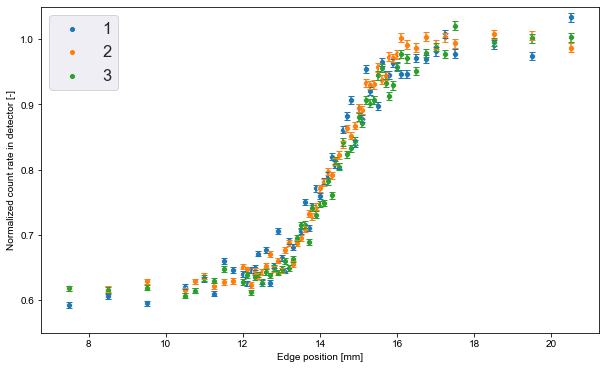

In [5]:
datasets_processed = {}
fig, ax = plt.subplots(figsize=(10,6))
sns.set(context='notebook', font_scale=1.5)
for ID in datasets.keys():
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    datasets_processed[ID] = data


    X = data['edge_pos_mm'].values
    Y = data['cps_new_normed'].values
    Y_err = data['cps_new_normed_err'].values

    sns.scatterplot(x=X, y=Y, ax=ax, label=ID)
    ax.errorbar(X, Y, xerr=None, yerr=Y_err,  ls='none', capsize=3)
    
plt.xlabel('Edge position [mm]')
plt.ylabel('Normalized count rate in detector [-]')
plt.legend()
plt.ylim(0.55, 1.05)
plt.show()

Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919
Mean of counts when edge is out: 0.9993783679735833
Mean of counts when edge is in: 0.6369834560595427
Mean of counts when edge is out: 0.9996935113933165
Mean of counts when edge is in: 0.6298863262175415


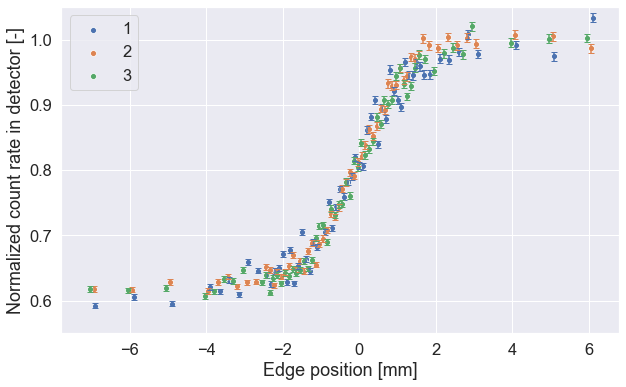

In [6]:
datasets_processed = {}
fig, ax = plt.subplots(figsize=(10,6))
sns.set(context='notebook', font_scale=1.5)
for ID in datasets.keys():
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data


    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values
    Y_err = data['cps_new_normed_err'].values

    sns.scatterplot(x=X, y=Y, ax=ax, label=ID)
    ax.errorbar(X, Y, xerr=None, yerr=Y_err,  ls='none', capsize=3)
    
plt.xlabel('Edge position [mm]')
plt.ylabel('Normalized count rate in detector [-]')
plt.legend()
plt.ylim(0.55, 1.05)
plt.show()



Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919
Mean of counts when edge is out: 0.9993783679735833
Mean of counts when edge is in: 0.6369834560595427
Mean of counts when edge is out: 0.9996935113933165
Mean of counts when edge is in: 0.6298863262175415


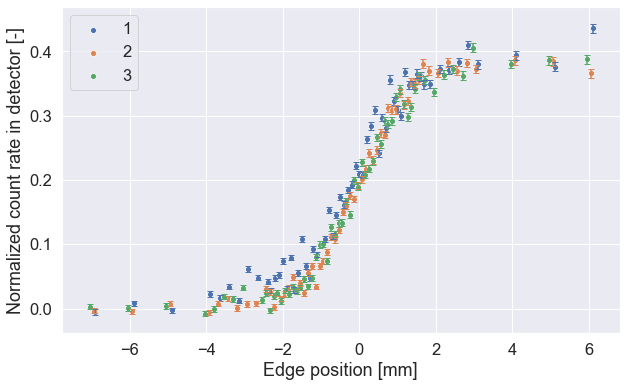

In [7]:
def normalize(data, col, threshold=-4):
    """
    Normalize the data based on column col with threshold
    """ 
    norm = data[ data.loc[:, 'edge_pos_centered'] < -4 ].loc[:, 'cps_new_normed'].mean()

    data[col] = data[col] - norm # shift so that left side is 0
    return data
datasets_processed = {}
fig, ax = plt.subplots(figsize=(10,6))
sns.set(context='notebook', font_scale=1.5)
for ID in datasets.keys():
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data
    threshold = -6 # smaller then -4: edge is fully in
    data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in

    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values
    Y_err = data['cps_new_normed_err'].values

    sns.scatterplot(x=X, y=Y, ax=ax, label=ID)
    ax.errorbar(X, Y, xerr=None, yerr=Y_err,  ls='none', capsize=3)
    
plt.xlabel('Edge position [mm]')
plt.ylabel('Normalized count rate in detector [-]')
plt.legend()
# plt.ylim(0.55, 1.05)
plt.show()



In [8]:
import numpy as np
from scipy import optimize as opt

# def model(x, *p):
#     """
#     Logistic function with four parameters that are:
#     # first parameter: y of the right side
#     # second parameter: zero pass through
#     # third parameter: slope
#     # fourth parameter: y of the left side
#     """
#     a, b, c, d = p

#     z = np.exp( -( (x-b)/(c) ) )

#     return (a / ( 1 + z )) + d


def model(x, *p):
    """
    Logistic function with four parameters that are:
    # first parameter: y of the right side
    # second parameter: zero pass through
    # third parameter: slope
    """
    a, b, c = p

    z = np.exp( -( (x-b)/(c) ) )

    return ( a / ( 1 + z ) ) 


def initial_guess(y):
    """
    For each of the parameters from the logistic fit function, make a guess for the value from a Normal distribution.
    Returns the guessed parameters
    """
    params = []
    # first parameter: y of the right side
    params.append(np.random.normal(loc=np.max(y), scale=np.std(y)))   
    # second parameter: zero pass through
    params.append(np.random.normal(loc=0, scale=np.std(y)))
    # third parameter: slope
    params.append(np.random.normal(loc=np.std(y), scale=np.std(y)))
    # fourth parameter: y of the left side
#     params.append(np.random.normal(loc=np.min(y), scale=np.std(y)))  
    
    return np.asarray(params)

def split_data(x, y, train_size=0.8):
    """
    Split the data randomly into a train and test set.
    train_size: between 0 and 1 the fraction of the training set size
    """
    n_train = int(y.size * train_size)
    i_data = np.cumsum(np.ones(x.size), dtype=np.int) - 1
    i_train = np.sort(
        np.random.choice(i_data, size=n_train, replace=False))
    i_test = np.setdiff1d(i_data, i_train)
    X_train = np.asarray(x[i_train], dtype=np.float64)
    X_test = np.asarray(x[i_test], dtype=np.float64)
    y_train = np.asarray(y[i_train], dtype=np.float64)
    y_test = np.asarray(y[i_test], dtype=np.float64)

    return X_train, y_train, X_test, y_test

def loss_function(p, x_data, y_data, model):
    """
    Loss function is the total sum of squared differences between the data points (given as x_data, y_data and the predicted points.
    - p: model parameters
    - x_data, y_data: data points
    - model: function for the model (fit)
    """
    # predicted points

    y_pred = model(x_data, *p)

    loss = np.sum( (y_pred - y_data)**2 ) # total sum of squared differences

    return loss

def train(model, x_train, y_train, n_iter=3):
    p_best = None
    best_loss = 1e100
    for _ in range(n_iter):
        # The arguments that will get passed to the error function,
        # in addition to the model parameters of the current iteration.
        loss_fun_args = (x_train, y_train, model)
        p_initial = initial_guess(y=y_train)
        # Confusingly the `x0` argument is not expecting the x value of
        # the data points or for the 0th element of a list. It is for the
        # initial guess for the parameter values.
        res = opt.minimize(
            fun=loss_function,
            x0=p_initial,
            method="Nelder-Mead",
            args=loss_fun_args,
        )
        loss = loss_function(
            res.x,
            x_train,
            y_train,
            model,
        )
        if loss < best_loss:
            best_loss = loss
            p_best = res.x

    return p_best


def compare_models(x, y, train_size=0.8, n_folds=50, n_iter=3):

    data_sets = []
    for i_fold in range(n_folds):
        data_sets.append(split_data(x, y, train_size=0.8))

    all_training_errors = []
    all_testing_errors = []
    all_p_finals = []
    for i_fold in range(n_folds):
        x_train, y_train, x_test, y_test = data_sets[i_fold]

        p_final = train(model, x_train, y_train)

        all_training_errors.append(loss_function(
            p_final, x_train, y_train, model))
        all_testing_errors.append(loss_function(
            p_final, x_test, y_test, model))
        all_p_finals.append(p_final)

    return all_p_finals, all_training_errors, all_testing_errors


In [9]:
def normalize(data, col, threshold=-4):
    """
    Normalize the data based on column col with threshold
    """ 
    norm = data[ data.loc[:, 'edge_pos_centered'] < -4 ].loc[:, 'cps_new_normed'].mean()

    data[col] = data[col] - norm # shift so that left side is 0
    return data



Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919


<ipython-input-8-59b5bce2006c>:28: RuntimeWarning: overflow encountered in exp
  z = np.exp( -( (x-b)/(c) ) )


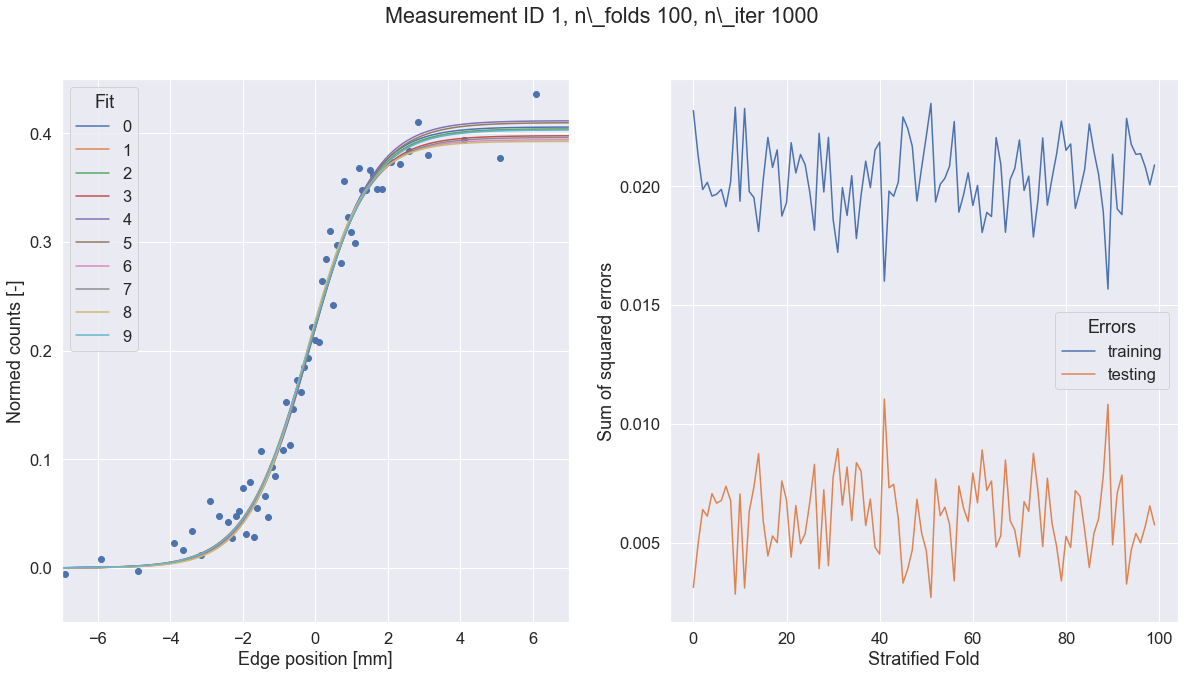

Mean of counts when edge is out: 0.9993783679735833
Mean of counts when edge is in: 0.6369834560595427


<ipython-input-8-59b5bce2006c>:28: RuntimeWarning: overflow encountered in exp
  z = np.exp( -( (x-b)/(c) ) )


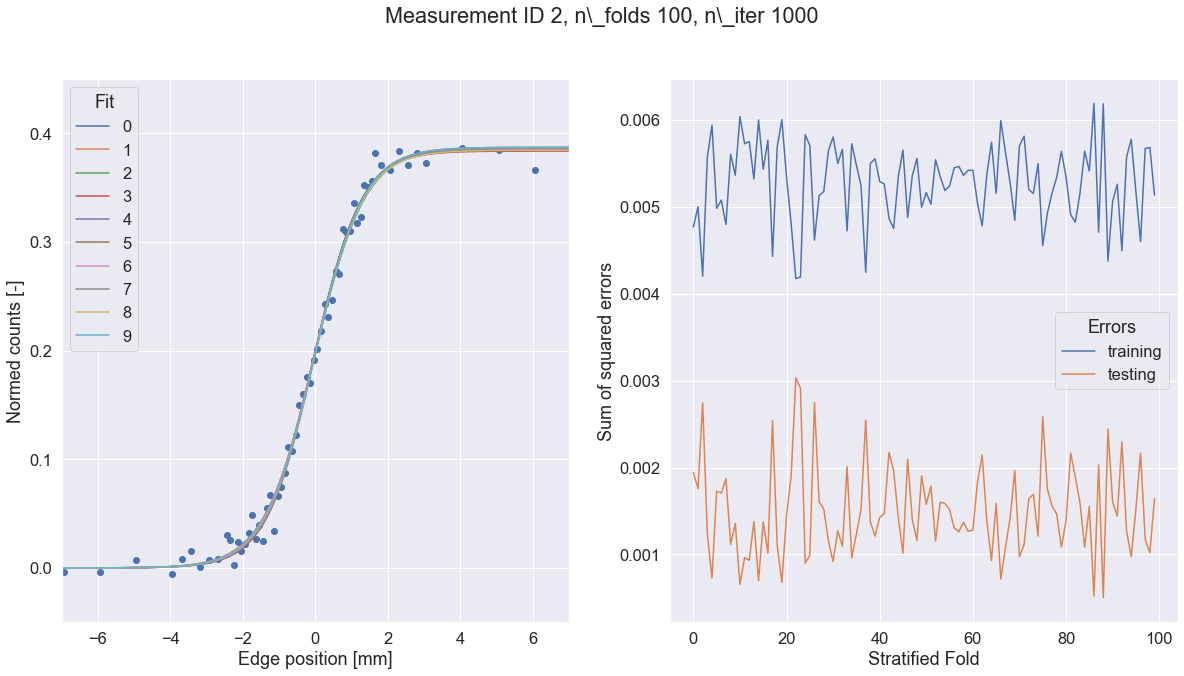

Mean of counts when edge is out: 0.9996935113933165
Mean of counts when edge is in: 0.6298863262175415


<ipython-input-8-59b5bce2006c>:28: RuntimeWarning: overflow encountered in exp
  z = np.exp( -( (x-b)/(c) ) )


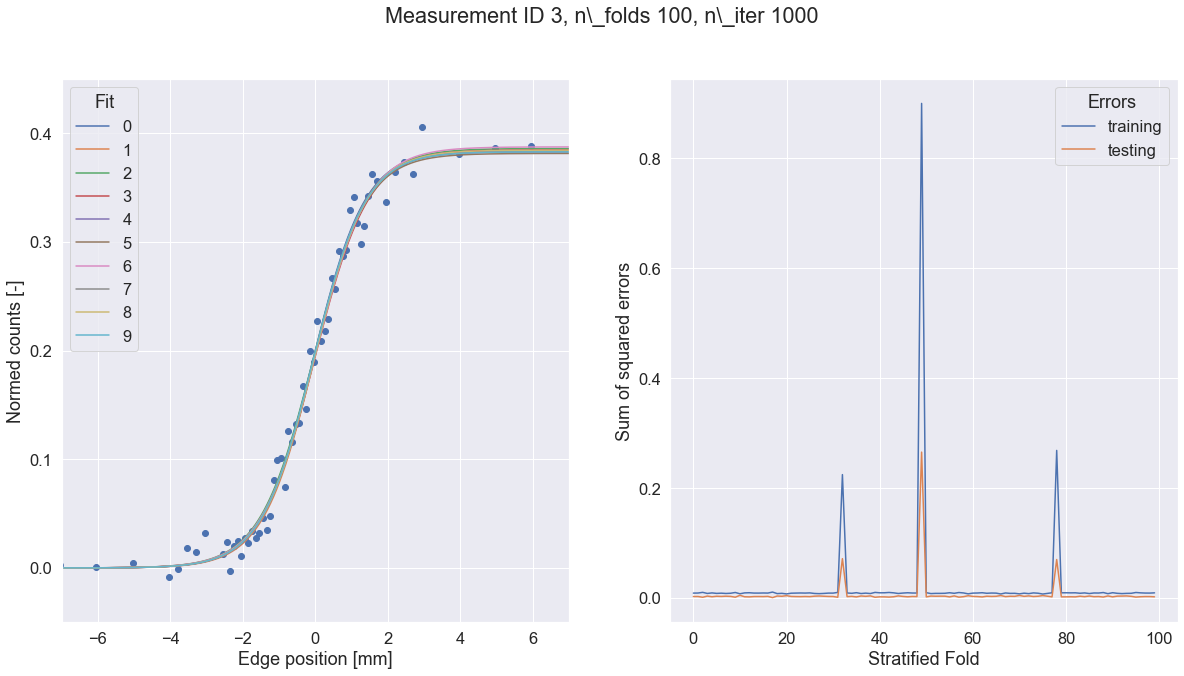

In [10]:
train_size = 0.95
n_folds = 100
n_iter = 1000
FWHMs = []
all_p_finals = []
all_training_errors = []

for ID in datasets.keys():
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

    threshold = -5 # smaller then -4: edge is fully in
    data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # p_finals, training_errors, testing_errors = compare_models(X, Y, train_size=0.8, n_folds=50, n_iter=50)
    p_finals, training_errors, testing_errors = compare_models(X, Y, train_size, n_folds, n_iter)
    p_finals_sample = p_finals[0:10]
    all_p_finals.append(p_finals)
    all_training_errors.append(training_errors)
    c = 2.*np.log(3 + 2 *np.sqrt(2))
    FWHMs.append(c * np.abs( np.asarray(p_finals)[:,2]) )
    sns.set(font_scale=1.5, context='notebook')
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Measurement ID {ID}, n\_folds {n_folds}, n\_iter {n_iter}')
    x = np.linspace(-10,10,1000)

    for ii, p in enumerate(p_finals_sample):
        Y_pred = model(x, *p)
        axs[0].plot(x, Y_pred, label=str(ii))

#     axs[0].plot(X_fit, Y_fit, '--', color='red', label='curve\_fit')
    axs[0].scatter(X, Y)
    axs[0].set_xlim(-7, 7)
    axs[0].set_ylim(-0.05, 0.45)
    axs[0].legend(title='Fit')
    axs[0].set_xlabel('Edge position [mm]')
    axs[0].set_ylabel('Normed counts [-]')

    axs[1].plot(training_errors, label='training')
    axs[1].plot(testing_errors, label='testing')
    axs[1].legend(title='Errors')
    axs[1].set_xlabel('Stratified Fold')
    axs[1].set_ylabel('Sum of squared errors')
    plt.show()

In [11]:
# drop those fits where the error exploded
threshold = 0.025
all_FWHMs_keep = []
all_idx_to_drop = []
all_training_errors_keep = []
all_p_finals_keep = []
for jj, train_errs in enumerate(all_training_errors):
    idx_to_drop = []
    FWHMs_keep = []
    training_errors_keep = []
    p_finals_keep= []
    for ii, err in enumerate(train_errs):
        if err > threshold:
            idx_to_drop.append(ii)
        else:
            FWHMs_keep.append(FWHMs[jj][ii])
            training_errors_keep.append(all_training_errors[jj][ii])
            p_finals_keep.append(all_p_finals[jj][ii])
    all_FWHMs_keep.append(FWHMs_keep)       
    all_training_errors_keep.append(training_errors_keep)       
    all_p_finals_keep.append(p_finals_keep)       

    all_idx_to_drop.append(idx_to_drop)


for f in all_FWHMs_keep:
    print(f"Mean FHWM {np.mean(f):.2f} mm, Std FHWM {np.std(f):.2f} mm")
    

Mean FHWM 3.03 mm, Std FHWM 0.11 mm
Mean FHWM 2.38 mm, Std FHWM 0.04 mm
Mean FHWM 2.56 mm, Std FHWM 0.05 mm


Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919


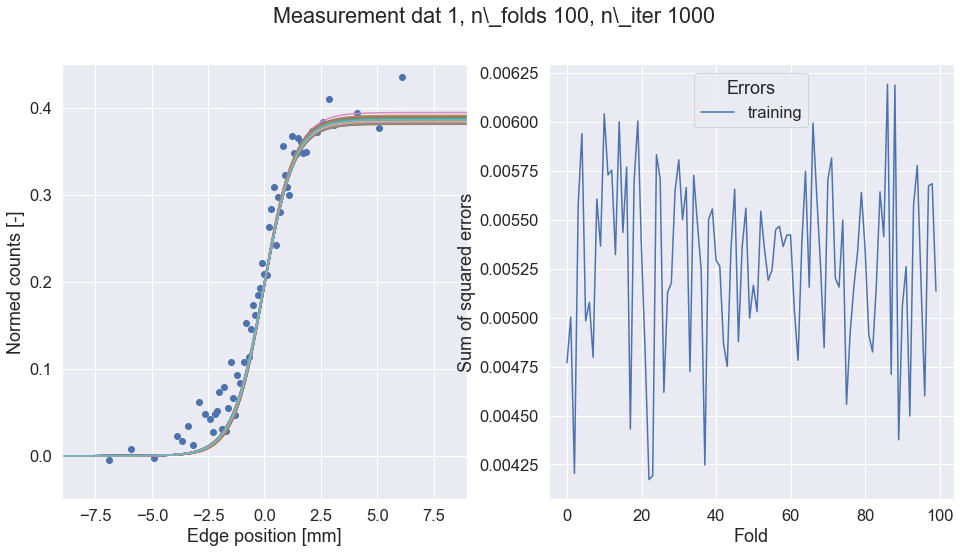

In [12]:
ii = 1 # first day
data = datasets[ii]
# normalize the counts and so on
data = process_data(data)
data = center_dataset(data, colname='cps_new_normed')
datasets_processed[ii] = data
p_finals = np.asarray(all_p_finals_keep[ii])
idx = range(len(p_finals))
random_idx = np.sort(np.random.choice(idx, size=10, replace=False))
# print(random_idx)
p_finals_sample = p_finals[random_idx]
training_errors = all_training_errors_keep[ii]


threshold = -4 # smaller then -4: edge is fully in
data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in

X = data['edge_pos_centered'].values
Y = data['cps_new_normed'].values

sns.set(font_scale=1.5, context='notebook')
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle(f'Measurement dat {ii}, n\_folds {n_folds}, n\_iter {n_iter}')
x = np.linspace(-10,10,1000)

# for ii, p in enumerate(p_finals_sample):
for ii, p in enumerate(p_finals):
    Y_pred = model(x, *p)
    axs[0].plot(x, Y_pred)

#     axs[0].plot(X_fit, Y_fit, '--', color='red', label='curve\_fit')
axs[0].scatter(X, Y)
axs[0].set_xlim(-9, 9)
axs[0].set_ylim(-0.05, 0.45)
# axs[0].legend(title='Fit')
axs[0].set_xlabel('Edge position [mm]')
axs[0].set_ylabel('Normed counts [-]')

axs[1].plot(training_errors, label='training')
# axs[1].plot(testing_errors, label='testing')
axs[1].legend(title='Errors')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('Sum of squared errors')
plt.show()

# Plot in paper

In [13]:
sns.reset_orig()
len(all_training_errors)

3

In [14]:
min_errs = []
idx_min_errs = []
p_fits = [] # parameters for the fit plot

for ii in range(len(all_training_errors_keep)):
    training_error = all_training_errors_keep[ii]
    # smallest training error
    min_err = np.min(training_error)
    idx_min_err = np.argmin(training_error)
    min_errs.append(min_err)
    idx_min_errs.append(idx_min_err)
    
    # corresponding set of parameters:
    p = all_p_finals_keep[ii][idx_min_err]
    p_fits.append(p)

Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919
Mean of counts when edge is out: 0.9993783679735833
Mean of counts when edge is in: 0.6369834560595427
Mean of counts when edge is out: 0.9996935113933165
Mean of counts when edge is in: 0.6298863262175415


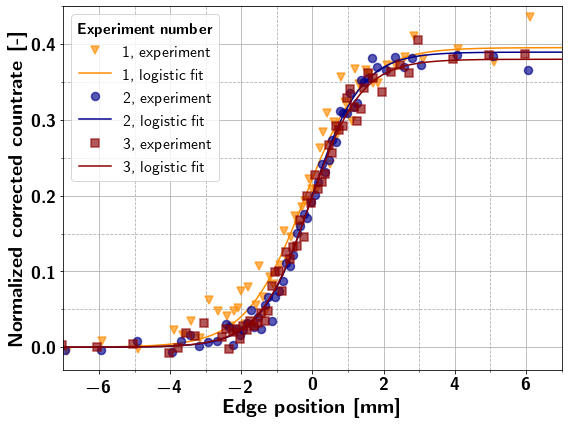

In [17]:
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# plot
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
fs = 20
markersize = 8
outputfolder = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/Figure_17_Detector_response_ESF/'
figname = f'ESF_with_fit_ALL'
colors = ['darkorange', 'darkblue', 'darkred']
labels = ['1', '2', '3']
markers = ['v','o','s']

for ID, m, c, lbl, p in zip(datasets.keys(), markers, colors, labels, p_fits):
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

    threshold = -4 # smaller then -4: edge is fully in
    data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # plot data
    ax1.plot(X, Y, m,color=c, markersize=markersize, label=f"{lbl}, experiment", alpha=0.65, markeredgewidth=1.5, markeredgecolor=c)
    
    # plot fit
    X_fit = np.linspace(-7,7,1000)
    Y_fit = model(X_fit, *p)
    ax1.plot(X_fit, Y_fit, color=c, label=f"{lbl}, logistic fit")
    
plt.xlabel(r'\textbf{Edge position [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized corrected countrate [-]}', fontsize=fs)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)

ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')


leg1 = plt.legend(loc="best",  fontsize=fs-4)
leg1.set_title(r"\textbf{Experiment number}", prop = {'size': fs-5})

# plt.yticks(np.arange(0.5,1.2,0.1))
# plt.xticks(np.arange(8,22,2))
plt.xlim(-7,7)
plt.ylim(-0.03,0.45)


plt.tight_layout()
plt.savefig(f'{outputfolder}{figname}_PAPER.png', dpi=600)
plt.savefig(f'{outputfolder}{figname}_PAPER.pdf', dpi=600)
plt.show()

# Plot in thesis

Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919
Mean of counts when edge is out: 0.9993783679735833
Mean of counts when edge is in: 0.6369834560595427
Mean of counts when edge is out: 0.9996935113933165
Mean of counts when edge is in: 0.6298863262175415


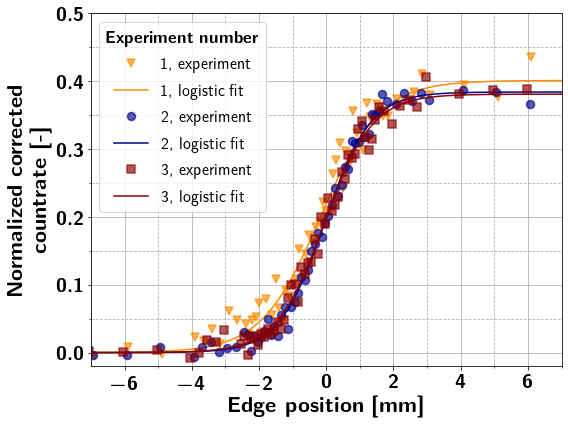

In [39]:
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# plot
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
fs = 22
markersize = 8
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_experiment/'
figname = f'ESF_with_fit_ALL'
colors = ['darkorange', 'darkblue', 'darkred']
labels = ['1', '2', '3']
markers = ['v','o','s']

for ID, m, c, lbl, p in zip(datasets.keys(), markers, colors, labels, p_fits):
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

    threshold = -4 # smaller then -4: edge is fully in
    data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # plot data
    ax1.plot(X, Y, m,color=c, markersize=markersize, label=f"{lbl}, experiment", alpha=0.65, markeredgewidth=1.5, markeredgecolor=c)
    
    # plot fit
    X_fit = np.linspace(-7,7,1000)
    Y_fit = model(X_fit, *p)
    ax1.plot(X_fit, Y_fit, color=c, label=f"{lbl}, logistic fit")
    
plt.xlabel(r'\textbf{Edge position [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized corrected}' + '\n' + r'\textbf{countrate [-]}', fontsize=fs)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)

ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')


leg1 = plt.legend(loc="best",  fontsize=fs-5)
leg1.set_title(r"\textbf{Experiment number}", prop = {'size': fs-5})

# plt.yticks(np.arange(0.5,1.2,0.1))
# plt.xticks(np.arange(8,22,2))
plt.xticks(np.arange(-6,8,2))
plt.xlim(-7,7)

plt.ylim(-0.02,0.5)


plt.tight_layout()
plt.savefig(f'{outputfolder}{figname}.pdf')
plt.show()

# Check the FWHM by computing the gradient

In [12]:
my_all_FWHMs = []
for ID in datasets.keys():

    data = datasets[ID]
    ii = ID - 1
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')

    p_finals = np.asarray(all_p_finals_keep[ii])
#     idx = range(len(p_finals))
#     random_idx = np.sort(np.random.choice(idx, size=10, replace=False))
    # print(random_idx)
#     p_finals_sample = p_finals[random_idx]
    training_errors = all_training_errors_keep[ii]


    threshold = -4 # smaller then -4: edge is fully in
    data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in

    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    X_fit = np.linspace(-10,10,1000)
    these_fhwms = []
    # for ii, p in enumerate(p_finals_sample):
    for ii, p in enumerate(p_finals):
        Y_pred = model(X_fit, *p)
        grad = np.gradient(Y_pred)
        maximum = np.max(grad)
        idx_max = np.argmax(grad)
        X_max = X_fit[idx_max]
        half_max = maximum/2


        # left side
        grad_left = grad[0:idx_max]
        idx_half = np.argmin(np.abs(grad_left-half_max))
        X_half_left = X_fit[idx_half]

        # right side
        grad_right = grad[idx_max:]
        idx_half = np.argmin(np.abs(grad_right-half_max))
        X_half_right = X_fit[idx_max+idx_half]

        # plt.scatter(X_half_left, half_max)
        # plt.scatter(X_half_right, half_max)
        # plt.plot(X_fit, grad)
        # plt.ylim(-0.0005, 0.003)
        # plt.show()
        f = np.abs(X_half_right-X_half_left)
        these_fhwms.append(f)
        
    my_all_FWHMs.append(these_fhwms)
    
for f in my_all_FWHMs:
    print(f"Mean FHWM {np.mean(f):.2f} mm, Std FHWM {np.std(f):.2f} mm")

Mean of counts when edge is out: 0.9972343386040047
Mean of counts when edge is in: 0.6369036247366919


NameError: name 'all_p_finals_keep' is not defined

# Do the same, but now with the logistic function that takes one more parameter for the shift in y

In [ ]:
import numpy as np
from scipy import optimize as opt

def model(x, *p):
    """
    Logistic function with four parameters that are:
    # first parameter: y of the right side
    # second parameter: zero pass through
    # third parameter: slope
    # fourth parameter: y of the left side
    """
    a, b, c, d = p

    z = np.exp( -( (x-b)/(c) ) )

    return (a / ( 1 + z )) + d




def initial_guess(y):
    """
    For each of the parameters from the logistic fit function, make a guess for the value from a Normal distribution.
    Returns the guessed parameters
    """
    params = []
    # first parameter: y of the right side
    params.append(np.random.normal(loc=np.max(y), scale=np.std(y)))   
    # second parameter: zero pass through
    params.append(np.random.normal(loc=0, scale=np.std(y)))
    # third parameter: slope
    params.append(np.random.normal(loc=np.std(y), scale=np.std(y)))
    # fourth parameter: y of the left side
    params.append(np.random.normal(loc=np.min(y), scale=np.std(y)))  
    
    return np.asarray(params)

def split_data(x, y, train_size=0.8):
    """
    Split the data randomly into a train and test set.
    train_size: between 0 and 1 the fraction of the training set size
    """
    n_train = int(y.size * train_size)
    i_data = np.cumsum(np.ones(x.size), dtype=np.int) - 1
    i_train = np.sort(
        np.random.choice(i_data, size=n_train, replace=False))
    i_test = np.setdiff1d(i_data, i_train)
    X_train = np.asarray(x[i_train], dtype=np.float64)
    X_test = np.asarray(x[i_test], dtype=np.float64)
    y_train = np.asarray(y[i_train], dtype=np.float64)
    y_test = np.asarray(y[i_test], dtype=np.float64)

    return X_train, y_train, X_test, y_test

def loss_function(p, x_data, y_data, model):
    """
    Loss function is the total sum of squared differences between the data points (given as x_data, y_data and the predicted points.
    - p: model parameters
    - x_data, y_data: data points
    - model: function for the model (fit)
    """
    # predicted points

    y_pred = model(x_data, *p)

    loss = np.sum( (y_pred - y_data)**2 ) # total sum of squared differences

    return loss

def train(model, x_train, y_train, n_iter=3):
    p_best = None
    best_loss = 1e100
    for _ in range(n_iter):
        # The arguments that will get passed to the error function,
        # in addition to the model parameters of the current iteration.
        loss_fun_args = (x_train, y_train, model)
        p_initial = initial_guess(y=y_train)
        # Confusingly the `x0` argument is not expecting the x value of
        # the data points or for the 0th element of a list. It is for the
        # initial guess for the parameter values.
        res = opt.minimize(
            fun=loss_function,
            x0=p_initial,
            method="Nelder-Mead",
            args=loss_fun_args,
        )
        loss = loss_function(
            res.x,
            x_train,
            y_train,
            model,
        )
        if loss < best_loss:
            best_loss = loss
            p_best = res.x

    return p_best


def compare_models(x, y, train_size=0.8, n_folds=50, n_iter=3):

    data_sets = []
    for i_fold in range(n_folds):
        data_sets.append(split_data(x, y, train_size=0.8))

    all_training_errors = []
    all_testing_errors = []
    all_p_finals = []
    for i_fold in range(n_folds):
        x_train, y_train, x_test, y_test = data_sets[i_fold]

        p_final = train(model, x_train, y_train)

        all_training_errors.append(loss_function(
            p_final, x_train, y_train, model))
        all_testing_errors.append(loss_function(
            p_final, x_test, y_test, model))
        all_p_finals.append(p_final)

    return all_p_finals, all_training_errors, all_testing_errors


In [ ]:
train_size = 0.95
n_folds = 100
n_iter = 10000
FWHMs = []
all_p_finals = []
all_training_errors = []

for ID in datasets.keys():
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

#     threshold = -5 # smaller then -4: edge is fully in
#     data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # p_finals, training_errors, testing_errors = compare_models(X, Y, train_size=0.8, n_folds=50, n_iter=50)
    p_finals, training_errors, testing_errors = compare_models(X, Y, train_size, n_folds, n_iter)
    p_finals_sample = p_finals[0:10]
    all_p_finals.append(p_finals)
    all_training_errors.append(training_errors)
    c = 2.*np.log(3 + 2 *np.sqrt(2))
    FWHMs.append(c * np.abs( np.asarray(p_finals)[:,2]) )
    sns.set(font_scale=1.5, context='notebook')
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Measurement ID {ID}, n\_folds {n_folds}, n\_iter {n_iter}')
    x = np.linspace(-10,10,1000)

    for ii, p in enumerate(p_finals_sample):
        Y_pred = model(x, *p)
        axs[0].plot(x, Y_pred, label=str(ii))

#     axs[0].plot(X_fit, Y_fit, '--', color='red', label='curve\_fit')
    axs[0].scatter(X, Y)
    axs[0].set_xlim(-7, 7)
    axs[0].set_ylim(0.55, 1.05)
    axs[0].legend(title='Fit')
    axs[0].set_xlabel('Edge position [mm]')
    axs[0].set_ylabel('Normed counts [-]')

    axs[1].plot(training_errors, label='training')
    axs[1].plot(testing_errors, label='testing')
    axs[1].legend(title='Errors')
    axs[1].set_xlabel('Stratified Fold')
    axs[1].set_ylabel('Sum of squared errors')
    plt.show()

In [ ]:
# drop those fits where the error exploded
threshold = 0.025
all_FWHMs_keep = []
all_idx_to_drop = []
all_training_errors_keep = []
all_p_finals_keep = []
for jj, train_errs in enumerate(all_training_errors):
    idx_to_drop = []
    FWHMs_keep = []
    training_errors_keep = []
    p_finals_keep= []
    for ii, err in enumerate(train_errs):
        if err > threshold:
            idx_to_drop.append(ii)
        else:
            FWHMs_keep.append(FWHMs[jj][ii])
            training_errors_keep.append(all_training_errors[jj][ii])
            p_finals_keep.append(all_p_finals[jj][ii])
    all_FWHMs_keep.append(FWHMs_keep)       
    all_training_errors_keep.append(training_errors_keep)       
    all_p_finals_keep.append(p_finals_keep)       

    all_idx_to_drop.append(idx_to_drop)


for f in all_FWHMs_keep:
    print(f"Mean FHWM {np.mean(f):.2f} mm, Std FHWM {np.std(f):.2f} mm")
    

In [ ]:
my_all_FWHMs = []
for ID in datasets.keys():

    data = datasets[ID]
    ii = ID - 1
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')

    p_finals = np.asarray(all_p_finals_keep[ii])
#     idx = range(len(p_finals))
#     random_idx = np.sort(np.random.choice(idx, size=10, replace=False))
    # print(random_idx)
#     p_finals_sample = p_finals[random_idx]
    training_errors = all_training_errors_keep[ii]


#     threshold = -4 # smaller then -4: edge is fully in
#     data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in

    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    X_fit = np.linspace(-10,10,1000)
    these_fhwms = []
    # for ii, p in enumerate(p_finals_sample):
    for ii, p in enumerate(p_finals):
        Y_pred = model(X_fit, *p)
        grad = np.gradient(Y_pred)
        maximum = np.max(grad)
        idx_max = np.argmax(grad)
        X_max = X_fit[idx_max]
        half_max = maximum/2


        # left side
        grad_left = grad[0:idx_max]
        idx_half = np.argmin(np.abs(grad_left-half_max))
        X_half_left = X_fit[idx_half]

        # right side
        grad_right = grad[idx_max:]
        idx_half = np.argmin(np.abs(grad_right-half_max))
        X_half_right = X_fit[idx_max+idx_half]

        # plt.scatter(X_half_left, half_max)
        # plt.scatter(X_half_right, half_max)
        # plt.plot(X_fit, grad)
        # plt.ylim(-0.0005, 0.003)
        # plt.show()
        f = np.abs(X_half_right-X_half_left)
        these_fhwms.append(f)
        
    my_all_FWHMs.append(these_fhwms)
    
for f in my_all_FWHMs:
    print(f"Mean FHWM {np.mean(f):.2f} mm, Std FHWM {np.std(f):.2f} mm")

# Plot in paper

In [ ]:
sns.reset_orig()
len(all_training_errors)

In [ ]:
min_errs = []
idx_min_errs = []
p_fits = [] # parameters for the fit plot

for ii in range(len(all_training_errors_keep)):
    training_error = all_training_errors_keep[ii]
    # smallest training error
    min_err = np.min(training_error)
    idx_min_err = np.argmin(training_error)
    min_errs.append(min_err)
    idx_min_errs.append(idx_min_err)
    
    # corresponding set of parameters:
    p = all_p_finals_keep[ii][idx_min_err]
    p_fits.append(p)

In [ ]:
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# plot
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
fs = 20
markersize = 8
outputfolder = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/Figure_17_Detector_response_ESF/'
figname = f'ESF_with_fit_ALL'
colors = ['darkorange', 'darkblue', 'darkred']
labels = ['1', '2', '3']
markers = ['v','o','s']

for ID, m, c, lbl, p in zip(datasets.keys(), markers, colors, labels, p_fits):
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

#     threshold = -4 # smaller then -4: edge is fully in
#     data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # plot data
    ax1.plot(X, Y, m,color=c, markersize=markersize, label=f"{lbl}, experiment", alpha=0.65, markeredgewidth=1.5, markeredgecolor=c)
    
    # plot fit
    X_fit = np.linspace(-7,7,1000)
    Y_fit = model(X_fit, *p)
    ax1.plot(X_fit, Y_fit, color=c, label=f"{lbl}, logistic fit")
    
plt.xlabel(r'\textbf{Edge position [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized corrected countrate [-]}', fontsize=fs)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)

ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')


leg1 = plt.legend(loc="best",  fontsize=fs-4)
# plt.yticks(np.arange(0.5,1.2,0.1))
# plt.xticks(np.arange(8,22,2))
plt.xlim(-7,7)
plt.ylim(0.56,1.05)


plt.tight_layout()
plt.savefig(f'{outputfolder}{figname}_PAPER.png', dpi=600)
plt.savefig(f'{outputfolder}{figname}_PAPER.pdf', dpi=600)
plt.show()

# Plot in thesis

In [ ]:
import matplotlib
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# plot
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
fs = 20
markersize = 8
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/emitting_spot_size_experiment/'
figname = f'ESF_with_fit_ALL'
colors = ['darkorange', 'darkblue', 'darkred']
labels = ['1', '2', '3']
markers = ['v','o','s']

for ID, m, c, lbl, p in zip(datasets.keys(), markers, colors, labels, p_fits):
    data = datasets[ID]
    # normalize the counts and so on
    data = process_data(data)
    data = center_dataset(data, colname='cps_new_normed')
    datasets_processed[ID] = data

#     threshold = -4 # smaller then -4: edge is fully in
#     data = normalize(data, col='cps_new_normed', threshold=threshold) # normalize the y values when edge fully in
    
    X = data['edge_pos_centered'].values
    Y = data['cps_new_normed'].values

    # plot data
    ax1.plot(X, Y, m,color=c, markersize=markersize, label=f"{lbl}, experiment", alpha=0.65, markeredgewidth=1.5, markeredgecolor=c)
    
    # plot fit
    X_fit = np.linspace(-7,7,1000)
    Y_fit = model(X_fit, *p)
    ax1.plot(X_fit, Y_fit, color=c, label=f"{lbl}, logistic fit")
    
plt.xlabel(r'\textbf{Edge position [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized corrected countrate [-]}', fontsize=fs)

# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)

ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')


leg1 = plt.legend(loc="best",  fontsize=fs-4)
# plt.yticks(np.arange(0.5,1.2,0.1))
# plt.xticks(np.arange(8,22,2))
plt.xlim(-7,7)
plt.ylim(0.55,1.05)


plt.tight_layout()
plt.savefig(f'{outputfolder}{figname}.pdf')
plt.show()